In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import finance_utils as fu
import ystockquote as ysq
import technical_indicators as ti
import stock_db_mgr as sdm

In [165]:
np.__version__

'1.19.5'

In [164]:
pd.__version__

'1.1.5'

In [125]:
plt.rcParams['figure.figsize'] = [12, 8]

# Numpy Test

In [30]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
1

1

In [32]:
1 + _

2

# Pandas Test

<AxesSubplot:>

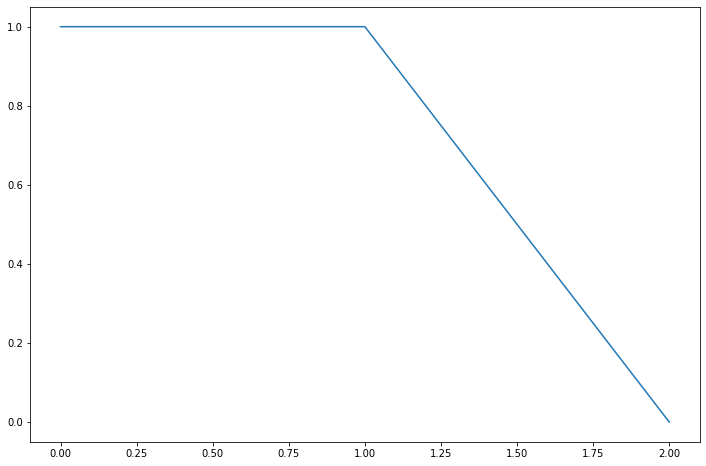

In [180]:
# True/False plotting:
(pd.Series(['apple', 'apple', 'banana']) == 'apple').mul(1).plot()

# Technical Indicator Tests

In [128]:
# stop is excluded
t = np.arange(-5, 6, 1)
t

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [129]:
s = ti.step(t)
s

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [130]:
r = ti.ramp(t)
r

array([-0., -0., -0., -0., -0.,  0.,  1.,  2.,  3.,  4.,  5.])

<StemContainer object of 3 artists>

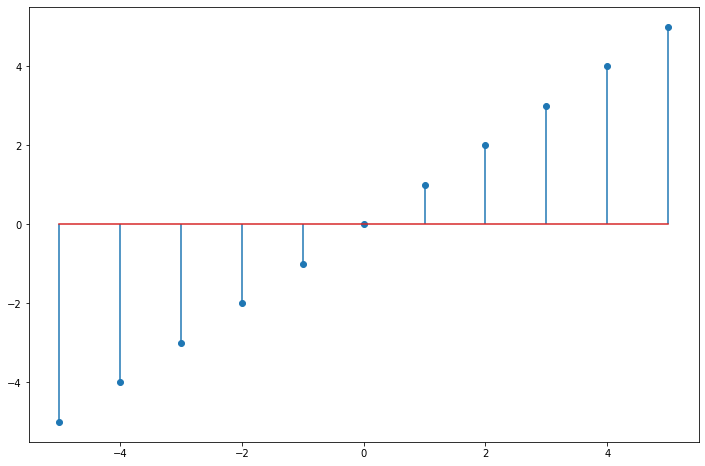

In [131]:
plt.stem(t, t)

<StemContainer object of 3 artists>

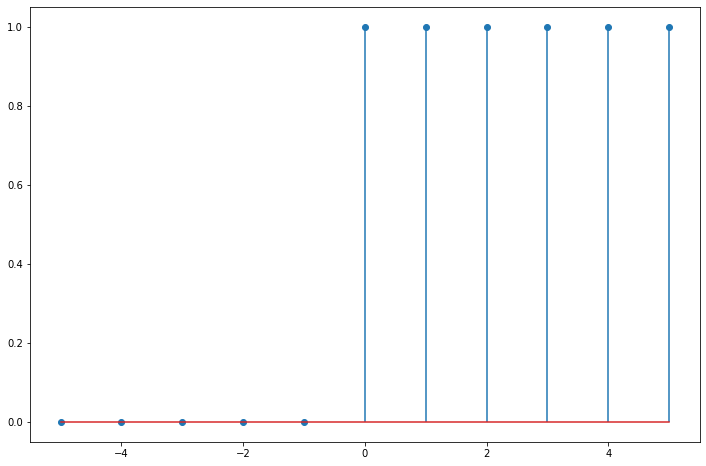

In [132]:
plt.stem(t, s)

<StemContainer object of 3 artists>

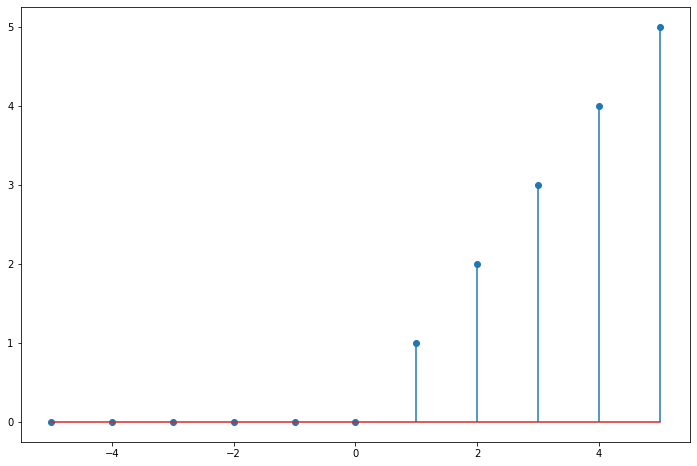

In [133]:
plt.stem(t, r)

# Finance Utils

In [34]:
fu.calc_commission(34)

5.069

In [36]:
fu.calc_commission_etf(34)

0.11900000000000001

# Yahoo Test

In [134]:
s = 'XBB.TO'
ysq.get_52_week_high(s)

32.4

In [135]:
ysq.get_52_week_low(s)

29.98

In [136]:
ysq.get_price(s)

30.65

# Stock DB Manager

In [137]:
db = sdm.StockDBMgr('stock_db/qt')

In [138]:
sym_list = db.get_all_symbols()
sym_list

['VUN.TO', 'XBB.TO', 'XEC.TO', 'XEF.TO', 'ZCN.TO']

In [139]:
for s in sym_list:
    print(db.validate_symbol_data('VUN.TO'))

True
True
True
True
True


In [105]:
db.update_all_symbols()

Downloading:VUN.TO ...
Downloading:XBB.TO ...
Downloading:XEC.TO ...
Downloading:XEF.TO ...
Downloading:ZCN.TO ...


In [181]:
s = sym_list[0]
s

'VUN.TO'

In [182]:
df = db.get_symbol_data(s)
df.head()

DATA,Open,High,Low,Close,Volume
Date,,,,,
2013-08-12,21.851339,21.851339,21.833539,21.851339,7300.0
2013-08-13,21.993760,22.002661,21.940357,22.002661,2100.0
2013-08-14,21.958154,21.958154,21.851344,21.869146,6300.0
2013-08-15,21.717841,21.717841,21.486420,21.486420,8400.0
2013-08-16,21.539826,21.602131,21.459720,21.486420,5400.0


In [142]:
df.tail()

DATA,Open,High,Low,Close,Volume
Date,,,,,
2022-02-23,75.440002,75.480003,73.620003,73.669998,90800.0
2022-02-24,71.779999,75.370003,71.769997,75.370003,81200.0
2022-02-25,75.309998,76.529999,75.139999,76.339996,52100.0
2022-02-28,75.849998,76.379997,75.330002,76.150002,39100.0
2022-03-01,76.150002,77.760002,74.940002,75.400002,44256.0


<AxesSubplot:xlabel='Date'>

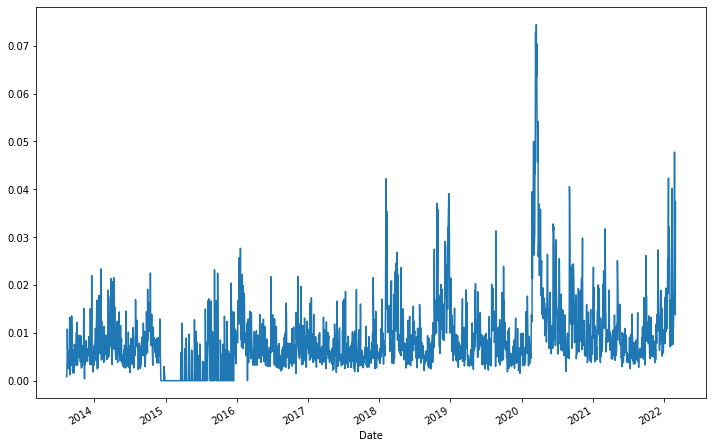

In [143]:
((df['High'] - df['Low']) / df['Close']).plot()

In [144]:
dfa = db.get_all_symbol_single_data_item('Close')
dfa.describe()

Loading XBB.TO ...
Loading XEC.TO ...
Loading XEF.TO ...
Loading ZCN.TO ...


Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
count,2146.000000,5340.000000,2228.000000,2228.000000,2958.000000
mean,45.865693,22.094747,22.543021,25.792981,17.300630
std,15.641013,5.815303,4.345781,4.861905,4.280485
min,21.361814,12.270431,14.700089,15.931489,11.006387
25%,33.902692,16.824345,18.537627,22.204698,13.448129
50%,43.549002,22.120776,22.754204,26.069119,16.687105
75%,54.072406,27.213626,25.516023,28.735111,19.849657
max,84.363998,32.746593,33.072250,36.347157,29.085384


In [201]:
dfa

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,NaN,12.700981,NaN,NaN,NaN
2000-11-24,NaN,12.677058,NaN,NaN,NaN
2000-11-27,NaN,12.677058,NaN,NaN,NaN
2000-11-28,NaN,12.748811,NaN,NaN,NaN
2000-11-29,NaN,12.772737,NaN,NaN,NaN
...,...,...,...,...,...
2022-02-23,73.669998,29.990000,28.430000,33.209999,27.889999
2022-02-24,75.370003,30.040001,27.920000,32.900002,27.920000
2022-02-25,76.339996,30.150000,28.230000,33.410000,28.410000


<AxesSubplot:xlabel='Date'>

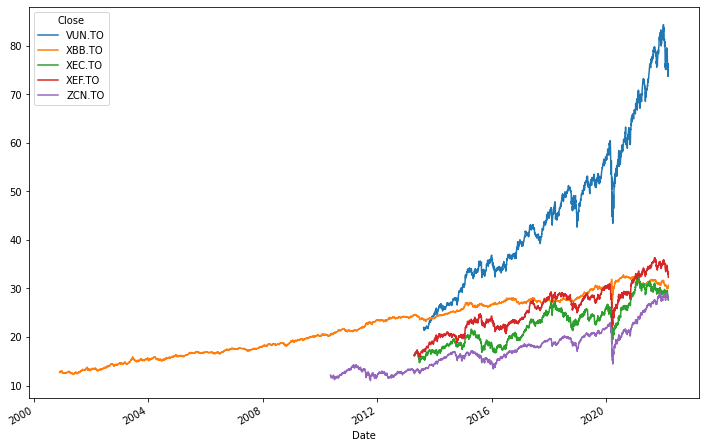

In [203]:
dfa.plot()

## N/A Testing

In [204]:
dfa.isna()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,True,False,True,True,True
2000-11-24,True,False,True,True,True
2000-11-27,True,False,True,True,True
2000-11-28,True,False,True,True,True
2000-11-29,True,False,True,True,True
...,...,...,...,...,...
2022-02-23,False,False,False,False,False
2022-02-24,False,False,False,False,False
2022-02-25,False,False,False,False,False


In [206]:
~(dfa.isna())

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,False,True,False,False,False
2000-11-24,False,True,False,False,False
2000-11-27,False,True,False,False,False
2000-11-28,False,True,False,False,False
2000-11-29,False,True,False,False,False
...,...,...,...,...,...
2022-02-23,True,True,True,True,True
2022-02-24,True,True,True,True,True
2022-02-25,True,True,True,True,True


In [207]:
dfa.notna()

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,False,True,False,False,False
2000-11-24,False,True,False,False,False
2000-11-27,False,True,False,False,False
2000-11-28,False,True,False,False,False
2000-11-29,False,True,False,False,False
...,...,...,...,...,...
2022-02-23,True,True,True,True,True
2022-02-24,True,True,True,True,True
2022-02-25,True,True,True,True,True


In [200]:
# .mul(1) to convert bool to 0-1
dfa.isna().mul(1)

Close,VUN.TO,XBB.TO,XEC.TO,XEF.TO,ZCN.TO
Date,,,,,
2000-11-23,1,0,1,1,1
2000-11-24,1,0,1,1,1
2000-11-27,1,0,1,1,1
2000-11-28,1,0,1,1,1
2000-11-29,1,0,1,1,1
...,...,...,...,...,...
2022-02-23,0,0,0,0,0
2022-02-24,0,0,0,0,0
2022-02-25,0,0,0,0,0


In [193]:
dfa.isna().any()

Close
VUN.TO     True
XBB.TO    False
XEC.TO     True
XEF.TO     True
ZCN.TO     True
dtype: bool

In [198]:
dfa.isna().any(axis='columns').head()

Date
2000-11-23    True
2000-11-24    True
2000-11-27    True
2000-11-28    True
2000-11-29    True
dtype: bool

<AxesSubplot:xlabel='Date'>

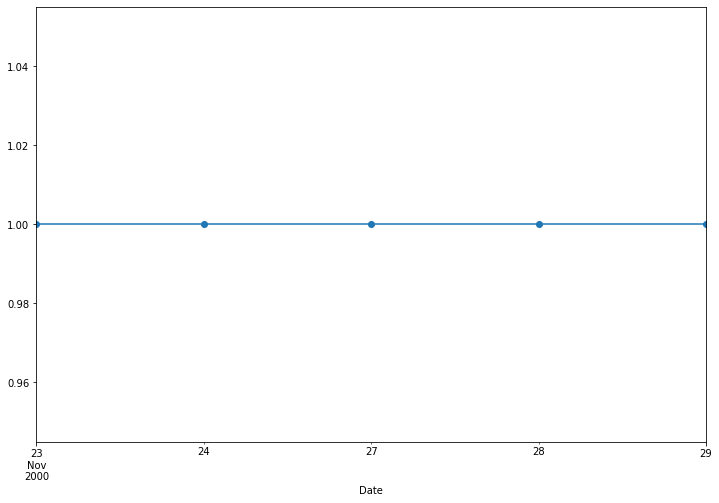

In [211]:
dfa.isna().head().any(1).mul(1).plot(marker='o')

In [163]:
df.dropna(axis=1, how='any', inplace=False)

DATA,Open,High,Low,Close,Volume
Date,,,,,
2013-08-12,21.851339,21.851339,21.833539,21.851339,7300.0
2013-08-13,21.993760,22.002661,21.940357,22.002661,2100.0
2013-08-14,21.958154,21.958154,21.851344,21.869146,6300.0
2013-08-15,21.717841,21.717841,21.486420,21.486420,8400.0
2013-08-16,21.539826,21.602131,21.459720,21.486420,5400.0
...,...,...,...,...,...
2022-02-23,75.440002,75.480003,73.620003,73.669998,90800.0
2022-02-24,71.779999,75.370003,71.769997,75.370003,81200.0
2022-02-25,75.309998,76.529999,75.139999,76.339996,52100.0


<AxesSubplot:xlabel='Date'>

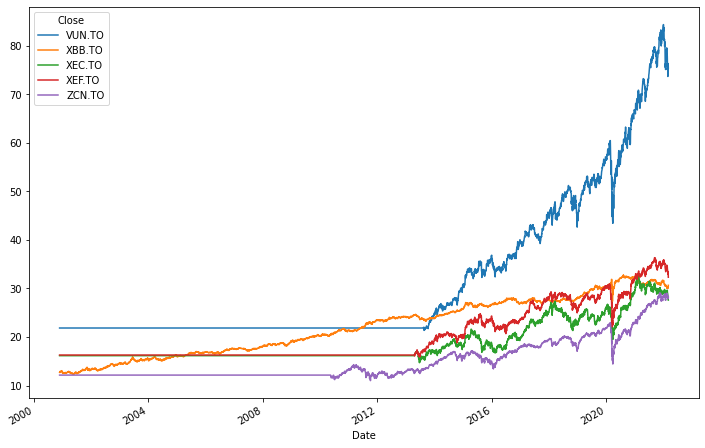

In [159]:
fu.fill_nan_data(dfa).plot()